# Siniestros viales semestre a semestre

----

# índice:

* Librerías y configuraciones
* Carga de datos
* Funciones auxiliares
* Análisis 
* kpis



----

# Librerías y configuraciones

In [93]:
# Importamos las librerías básicas:
import pandas as pd
import matplotlib.pyplot as plt
# from matplotlib.ticker import MultipleLocator
# from matplotlib.ticker import MaxNLocator
import seaborn as sns
import numpy as np
# from scipy.stats import norm
# from sklearn.preprocessing import StandardScaler
# from scipy import stats
import warnings


warnings.filterwarnings('ignore') # Para evitar los molestos avisos.

pd.set_option('display.max_colwidth', 200)
pd.options.display.max_columns = None


# %matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
# plt.rcParams['figure.figsize'] = (5,5)
plt.style.use("_mpl-gallery-nogrid")

# Carga de datos

In [94]:
# Asignamos los datos a un dataframe:
df_hechos = pd.read_csv('../data/hechos.csv')
df_victimas = pd.read_csv('../data/victimas.csv')
df_diccionario_fallecimientos = pd.read_csv('../data/diccionarios/diccionario_valores_de_variables_del_df_homicidios.csv')
df_diccionario_variables_del_df_victimas = pd.read_csv('../data/diccionarios/diccionario_de_variables_y_definiciones_del_df_victimas.csv')

# Funciones auxiliares

In [95]:
# Definir una función para obtener el semestre a partir de la fecha
def obtener_semestre(fecha):
    if fecha.month <= 6:
        return f'{fecha.year}-1'
    else:
        return f'{fecha.year}-2'

In [96]:
df_victimas.head(1)

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00


In [97]:
df_victimas['FECHA'] =  pd.to_datetime(df_victimas['FECHA'], format='%Y-%m-%d')

In [98]:
df_victimas['semestre'] = df_victimas['FECHA'].apply(obtener_semestre)
# df_hechos['semestre'] = df_hechos['fecha'].apply(obtener_semestre)

In [99]:
df_femenino = df_victimas[df_victimas['SEXO'] == 'FEMENINO']
df_masculino = df_victimas[df_victimas['SEXO'] == 'MASCULINO']

----

In [100]:
df_hechos

,id,n_victimas,fecha,aaaa,mm,dd,hora,hh,lugar_del_hecho,tipo_de_calle,calle,altura,cruce,direccion_normalizada,comuna,xy,x,y,participantes,victima,acusado
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., GRAL. AV.",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,RIESTRA AV.,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.",NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,GAONA AV.,NaN,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,"PERON, EVA AV.",4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


In [101]:
df_kpi = df_victimas.groupby('semestre').size().reset_index(name='n_victimas')

In [102]:
df_kpi['tasa_de_homicidios'] = round(df_kpi.n_victimas/3000000*100000,2) 

# utilizamos el valor de 3000000 para el cálculo, el cual es un valor intermedio entre los valores del censo de 2022 y 2010
# fuentes
# censo 2022 https://www.indec.gob.ar/ftp/cuadros/poblacion/cnphv2022_resultados_provisionales.pdf pag 12
# censo 2010 https://www.indec.gob.ar/indec/web/Nivel4-CensoProvincia-3-999-02-999-2010

df_kpi['porcentaje_de_cambio'] = round(df_kpi.tasa_de_homicidios.pct_change()* 100,2)
df_kpi

,semestre,n_victimas,tasa_de_homicidios,porcentaje_de_cambio
0,2016-1,65,2.17,NaN
1,2016-2,81,2.70,24.42
2,2017-1,69,2.30,-14.81
3,2017-2,71,2.37,3.04
4,2018-1,70,2.33,-1.69
5,2018-2,79,2.63,12.88
6,2019-1,57,1.90,-27.76
7,2019-2,47,1.57,-17.37
8,2020-1,31,1.03,-34.39
9,2020-2,50,1.67,62.14


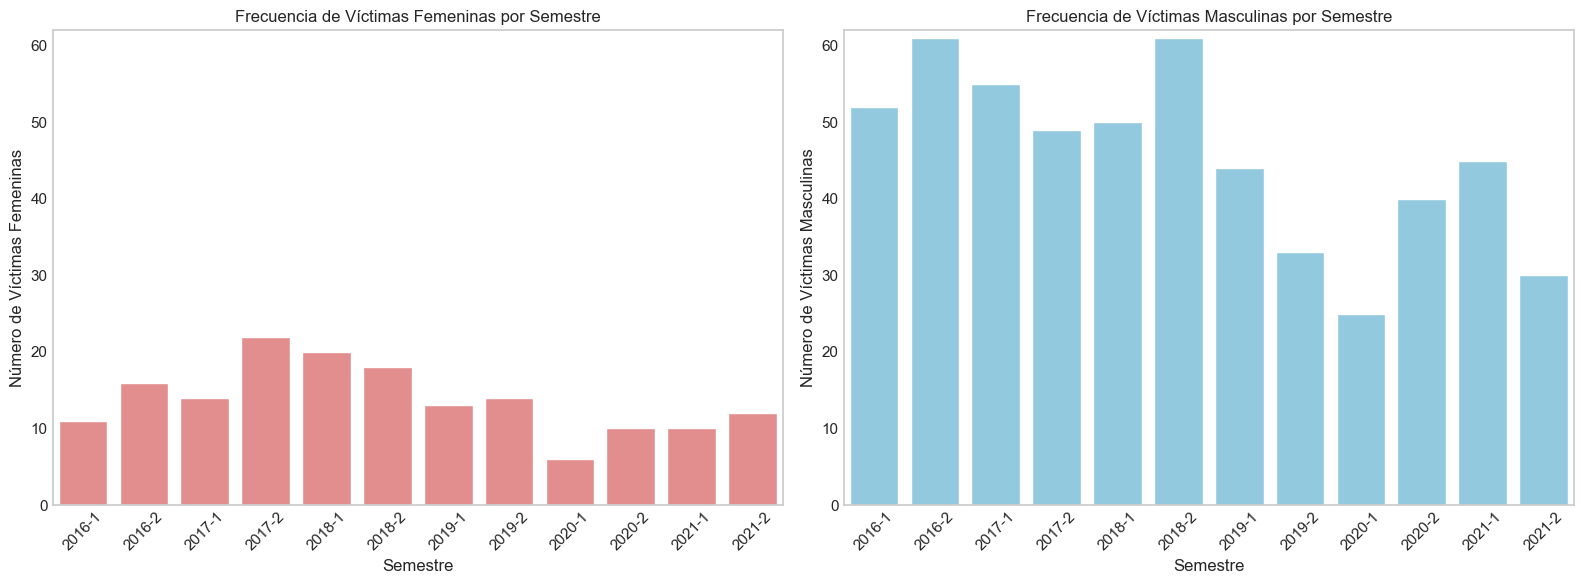

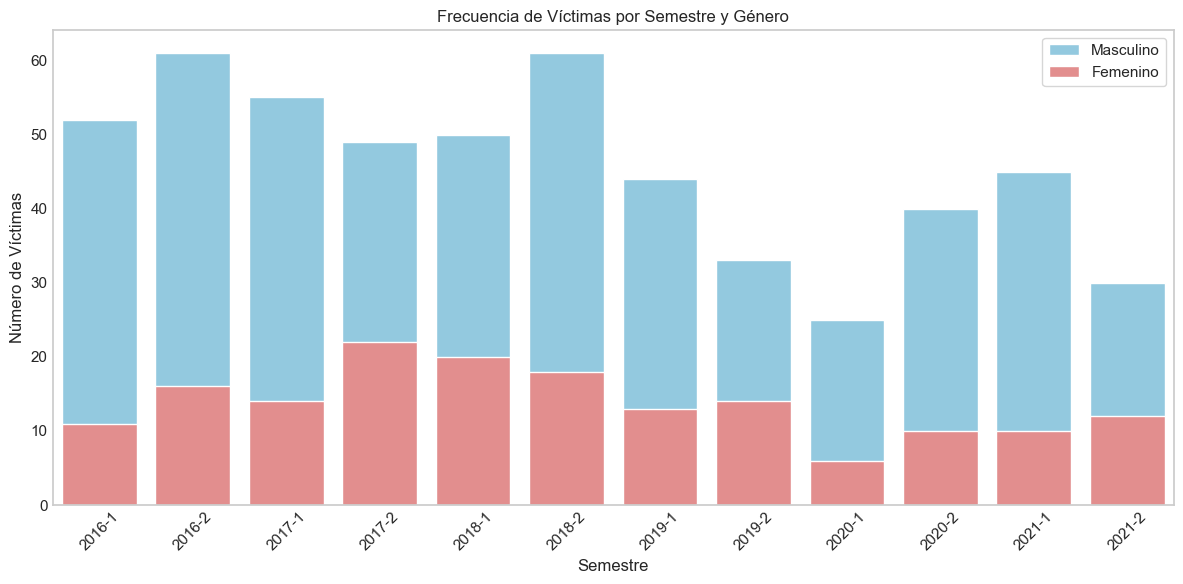

In [103]:
# agrupamos por semestre y sexo
victim_freq= df_victimas.groupby(['semestre', 'SEXO']).size().unstack()

# Creamos un gráfico
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Gráfico para víctimas femeninas
sns.barplot(x=victim_freq.index, y='FEMENINO', data=victim_freq, color='lightcoral', ax=axes[0])
axes[0].set_xlabel('Semestre')
axes[0].set_ylabel('Número de Víctimas Femeninas')
axes[0].set_title('Frecuencia de Víctimas Femeninas por Semestre')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylim(0, 62) 

# Gráfico para víctimas masculinas
sns.barplot(x=victim_freq.index, y='MASCULINO', data=victim_freq, color='skyblue', ax=axes[1])
axes[1].set_xlabel('Semestre')
axes[1].set_ylabel('Número de Víctimas Masculinas')
axes[1].set_title('Frecuencia de Víctimas Masculinas por Semestre')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(0, 62) 

plt.tight_layout()
plt.show()

victim_freq = df_victimas.groupby(['semestre', 'SEXO']).size().unstack()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=victim_freq.index, y='MASCULINO', data=victim_freq, label='Masculino', color='skyblue')
sns.barplot(x=victim_freq.index, y='FEMENINO', data=victim_freq, label='Femenino', color='lightcoral')
plt.xlabel('Semestre')
plt.ylabel('Número de Víctimas')
plt.title('Frecuencia de Víctimas por Semestre y Género')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Podemos ver que la matoría de las victimas en accidentes viales fueron de sexo masculino.

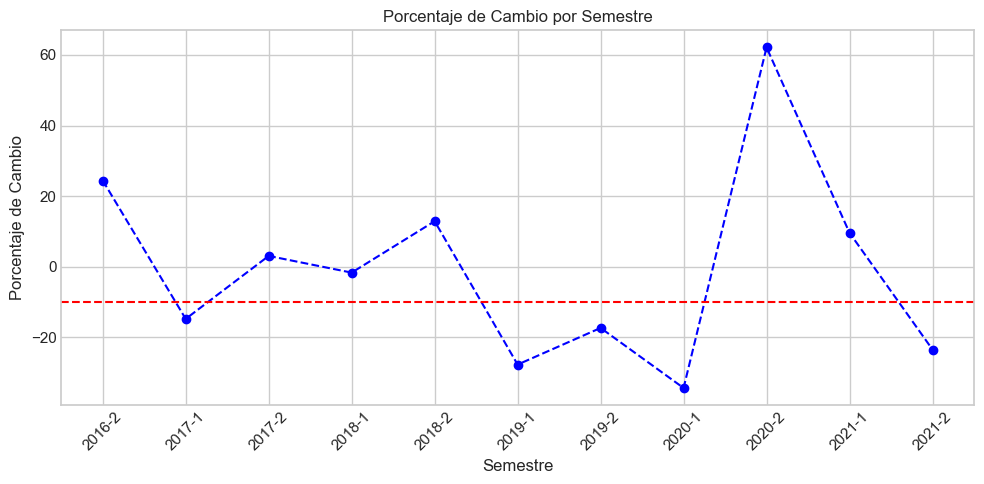

In [104]:
plt.figure(figsize=(10, 5))
plt.plot(df_kpi['semestre'], df_kpi['porcentaje_de_cambio'], marker='o', color='b', linestyle='--')
plt.xlabel('Semestre')
plt.ylabel('Porcentaje de Cambio')
plt.title('Porcentaje de Cambio por Semestre')
plt.axhline(y=-10, color='r', linestyle='--', label='Línea Horizontal a y=-10')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

-Podemos ver que la tasa de homicidios disminuyó en el período 2018-2 a 2020-1. En 2020 se pusieron en marcha medidas sanitarias como respuesta a la pandemia del virus COVID-19 por lo que se presentaron condiciones atípicas en ese período. Luego podemos ver que la curva volvió a decrecer.

----

In [105]:
df_victimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO,semestre
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00,2016-1
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00,2016-1
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00,2016-1
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD,2016-1
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00,2016-1
...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00,2021-2
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00,2021-2
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00,2021-2
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00,2021-2


* ¿En que se transportaban las mujeres que resultaron victimas?

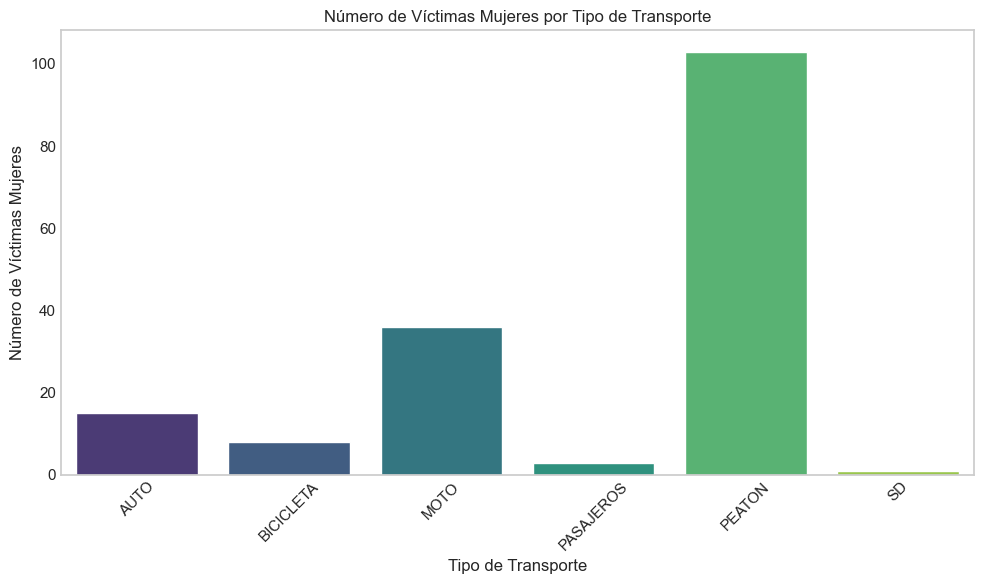

In [106]:

# Filtramos el DataFrame para obtener solo las víctimas mujeres
df_mujeres = df_victimas[df_victimas['SEXO'] == 'FEMENINO']

# CContamos la cantidad de víctimas mujeres por tipo de transporte
count_by_victima = df_mujeres.groupby('VICTIMA').size().reset_index(name='cantidad')

# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='VICTIMA', y='cantidad', data=count_by_victima, palette='viridis')
plt.xlabel('Tipo de Transporte')
plt.ylabel('Número de Víctimas Mujeres')
plt.title('Número de Víctimas Mujeres por Tipo de Transporte')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


La mayoría de las victimas femeninas eran peatonas o se transportaban en moto

* ¿En que se transportaban los hombres que resultaron victimas?

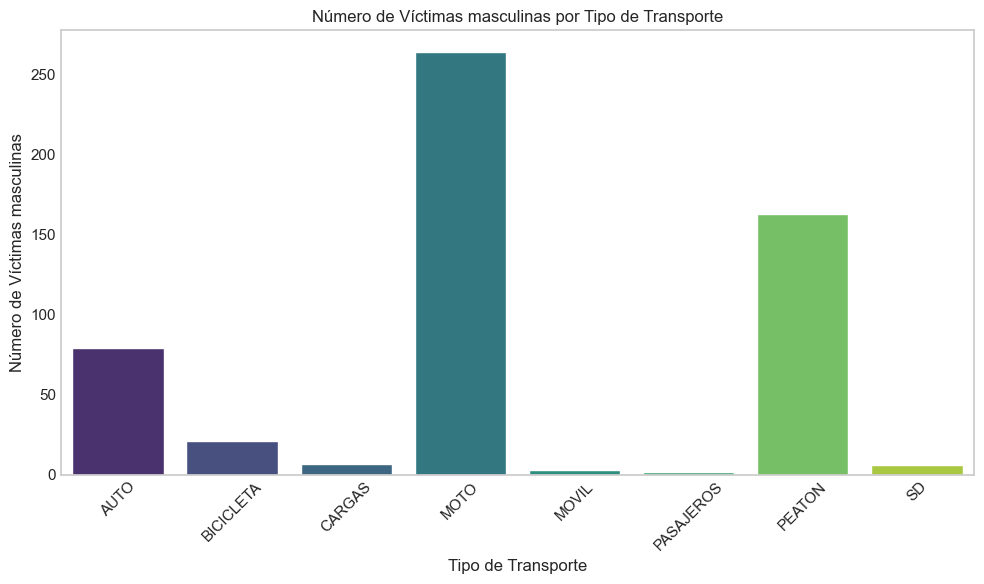

In [120]:

# Filtramos el DataFrame para obtener solo las víctimas hombres
df_mujeres = df_victimas[df_victimas['SEXO'] == 'MASCULINO']

# Contamos la cantidad de víctimas mujeres por tipo de transporte
count_by_victima = df_mujeres.groupby('VICTIMA').size().reset_index(name='cantidad')

# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='VICTIMA', y='cantidad', data=count_by_victima, palette='viridis')
plt.xlabel('Tipo de Transporte')
plt.ylabel('Número de Víctimas masculinas')
plt.title('Número de Víctimas masculinas por Tipo de Transporte')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


La mayoría de las victimas masculinas transportaban en moto o eran peatones.

----

* ¿En que se transportaban las personas que resultaron victimas en 2021 según su sexo?

In [108]:
df_femenino

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO,semestre
10,2016-0015,2016-02-14,2016,2,14,PEATON,PEATON,FEMENINO,16,2016-02-14 00:00:00,2016-1
11,2016-0016,2016-02-14,2016,2,14,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,19,2016-02-14 00:00:00,2016-1
13,2016-0019,2016-02-17,2016,2,17,PEATON,PEATON,FEMENINO,65,2016-02-17 00:00:00,2016-1
31,2016-0043,2016-03-30,2016,3,30,PEATON,PEATON,FEMENINO,56,2016-03-30 00:00:00,2016-1
35,2016-0048,2016-04-15,2016,4,15,PEATON,PEATON,FEMENINO,SD,SD,2016-1
...,...,...,...,...,...,...,...,...,...,...,...
696,2021-0077,2021-10-18,2021,10,18,CONDUCTOR,MOTO,FEMENINO,31,2021-10-18 00:00:00,2021-2
707,2021-0087,2021-11-27,2021,11,27,PEATON,PEATON,FEMENINO,73,2021-11-27 00:00:00,2021-2
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00,2021-2
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00,2021-2


¿La tendencia anterior se mantenía en 2021?

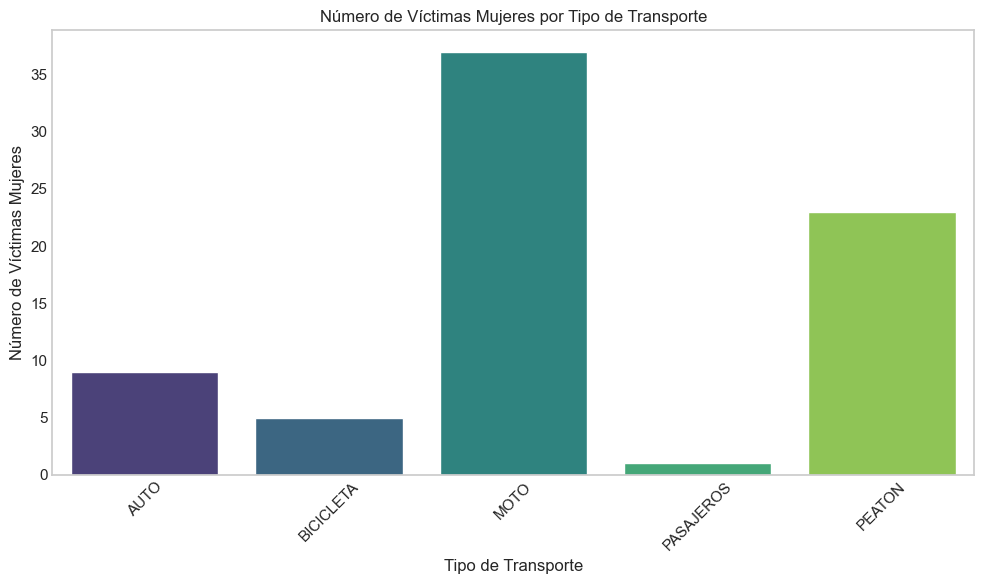

In [109]:

df_mujeres_2021 = df_mujeres[df_mujeres.AAAA==2021]
# Cuenta la cantidad de víctimas mujeres por tipo de transporte
count_by_victima = df_mujeres_2021.groupby('VICTIMA').size().reset_index(name='cantidad')

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='VICTIMA', y='cantidad', data=count_by_victima, palette='viridis')
plt.xlabel('Tipo de Transporte')
plt.ylabel('Número de Víctimas Mujeres')
plt.title('Número de Víctimas Mujeres por Tipo de Transporte')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

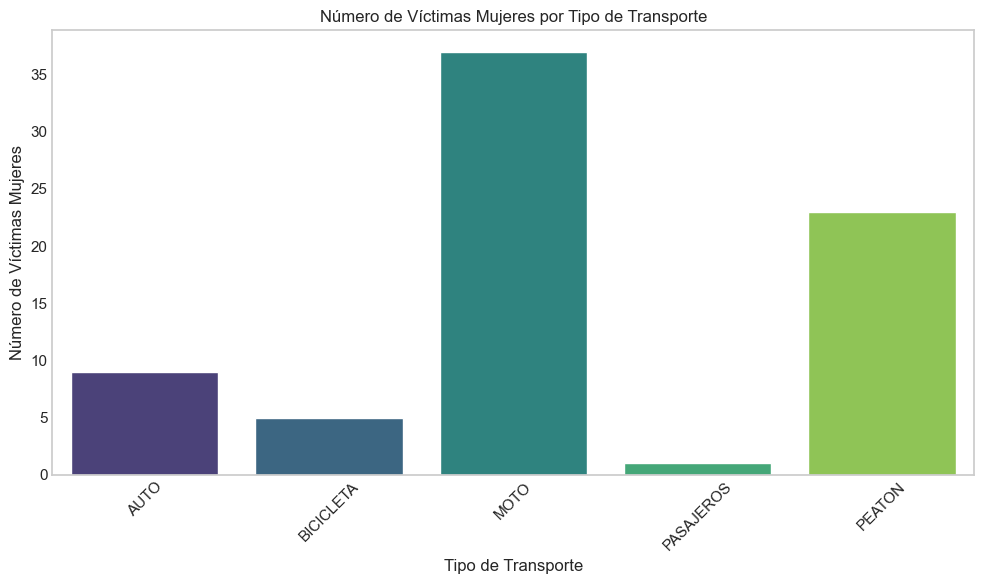

In [110]:

df_masculino_2021 = df_mujeres[df_masculino.AAAA==2021]
# Cuenta la cantidad de víctimas mujeres por tipo de transporte
count_by_victima = df_mujeres_2021.groupby('VICTIMA').size().reset_index(name='cantidad')

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='VICTIMA', y='cantidad', data=count_by_victima, palette='viridis')
plt.xlabel('Tipo de Transporte')
plt.ylabel('Número de Víctimas Mujeres')
plt.title('Número de Víctimas Mujeres por Tipo de Transporte')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Sí, en 2021 la mayoria de las victimas fueron peatones o se transportaban en motocicleta (ambos sexos).

----

In [111]:
df_peaton = df_hechos[df_hechos.victima== 'PEATON']

In [112]:
df_hechos.victima.unique()

array(['MOTO', 'AUTO', 'PEATON', 'SD', 'CARGAS', 'BICICLETA', 'PASAJEROS',
       'MOVIL', 'OBJETO FIJO', 'PEATON_MOTO'], dtype=object)

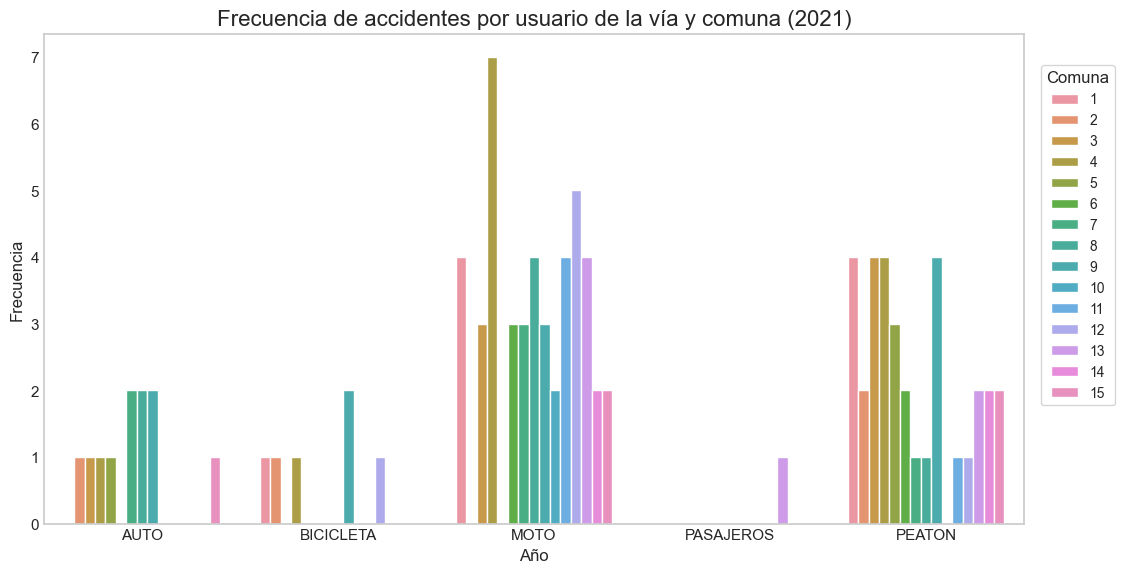

In [113]:
# Agrupamos por año y comuna y contamos la frecuencia de accidentes
data_grouped = df_hechos[df_hechos.aaaa==2021].groupby(['victima', 'comuna']).size().reset_index(name='frecuencia')

# Creamos el gráfico de barras agrupadas
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=data_grouped, x='victima', y='frecuencia', hue='comuna', ci=None,) # palette='colorblind')
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Título y etiquetas
plt.title('Frecuencia de accidentes por usuario de la vía y comuna (2021)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar la leyenda
plt.legend(title='Comuna', title_fontsize='12', fontsize='10', bbox_to_anchor=(1.01, 0.95))

# Mostrar el gráfico
plt.show()

La comuna 4 presenta la mayor cantidad de victimas que se transportaban en moto.

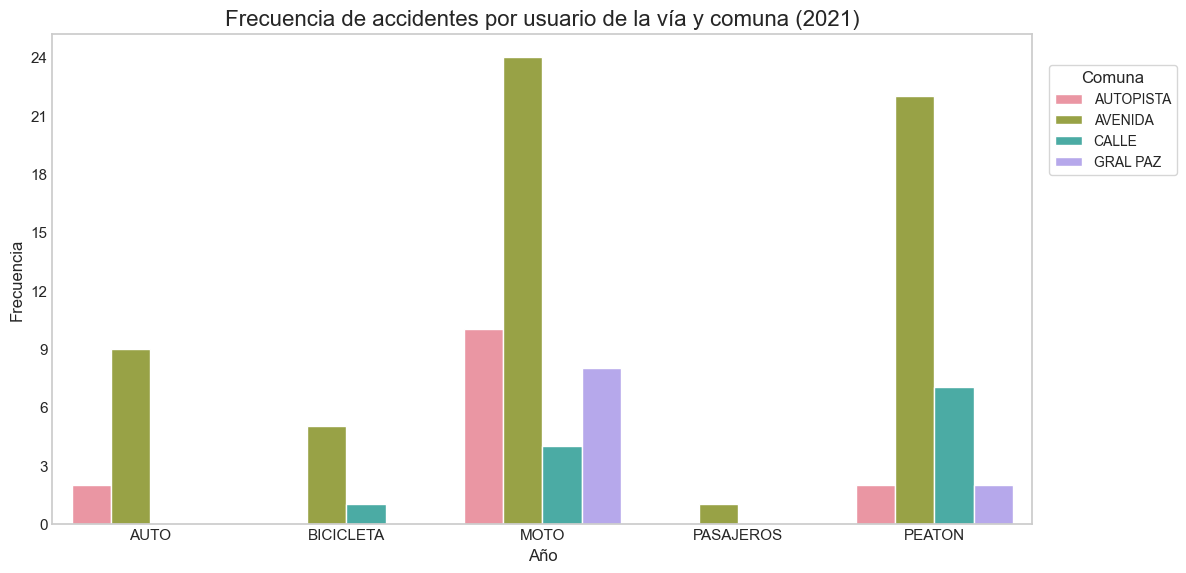

In [114]:
# Agrupamos por año y comuna y contamos la frecuencia de accidentes
data_grouped = df_hechos[df_hechos.aaaa==2021].groupby(['victima', 'tipo_de_calle']).size().reset_index(name='frecuencia')

# Creamos el gráfico de barras agrupadas
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=data_grouped, x='victima', y='frecuencia', hue='tipo_de_calle', ci=None,) # palette='colorblind')
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Título y etiquetas
plt.title('Frecuencia de accidentes por usuario de la vía y comuna (2021)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar la leyenda
plt.legend(title='Comuna', title_fontsize='12', fontsize='10', bbox_to_anchor=(1.01, 0.95))

# Mostrar el gráfico
plt.show()

La mayoría de los accidentes de motociclistas se dan en avenidas.

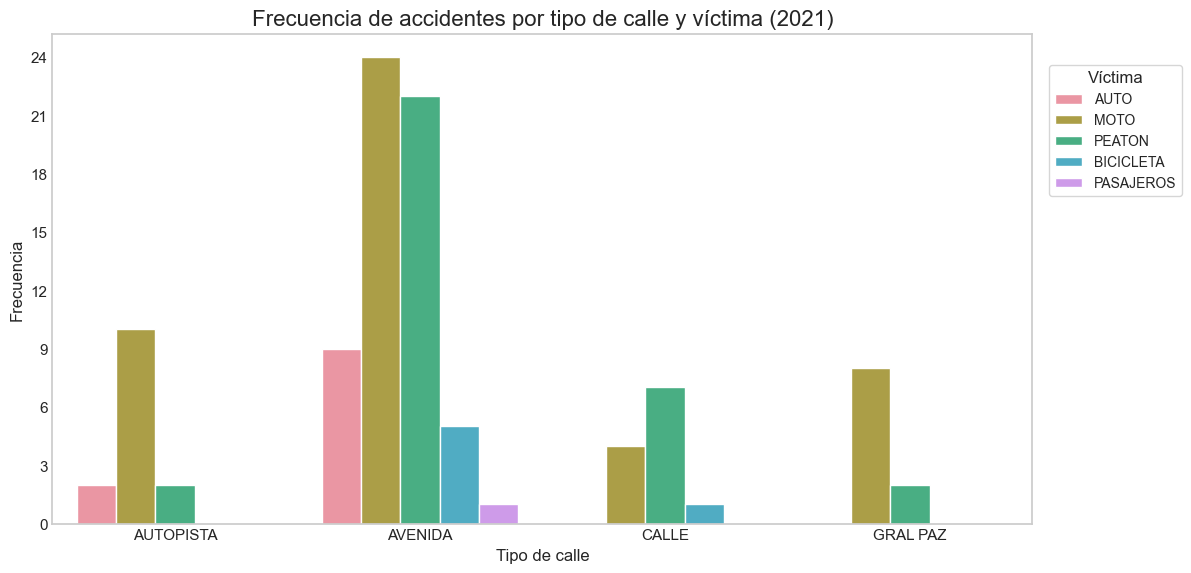

In [115]:
# Agrupamos por año y comuna y contamos la frecuencia de accidentes
data_grouped = df_hechos[df_hechos.aaaa==2021].groupby(['tipo_de_calle','victima']).size().reset_index(name='frecuencia')

# Creamos el gráfico de barras agrupadas
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=data_grouped, x='tipo_de_calle', y='frecuencia', hue='victima', ci=None,) # palette='colorblind')
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Título y etiquetas
plt.title('Frecuencia de accidentes por tipo de calle y víctima (2021)', fontsize=16)
plt.xlabel('Tipo de calle', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar la leyenda
plt.legend(title='Víctima', title_fontsize='12', fontsize='10', bbox_to_anchor=(1.01, 0.95))

# Mostrar el gráfico
plt.show()

La mayoría de los accidentes de motociclistas en 2021 se produjeron en avenidas.

# KPI

Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior.

Definimos a la tasa de homicidios en siniestros viales como el número de víctimas fatales en accidentes de tránsito por cada 100,000 habitantes en un área geográfica durante un período de tiempo específico. Su fórmula es: (Número de homicidios en siniestros viales / Población total) * 100,000

# KPI
    
Reducir en un 6% la cantidad de victimas mortales en avenidas en el último año, en CABA, respecto al año anterior.

Definimos a la cantidad de victimas mortales en avenidas como el número de víctimas fatales en accidentes de tránsito ocurridos en un tipo de calle considerado avenida en un determinado período temporal.

Su fórmula es: (Número de accidentes mortales en avenidas en el año anterior - Número de accidentes mortales en avenidas en el año actual) / (Número de accidentes mortales en avenidas en el año anterior) * 100
